## Simple Linear Regression and Multiple Linear Regression

A single X in a one-item list or multiple X's in a list [X] as independent variable(s)

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
lm = LinearRegression()
lm

LinearRegression()

In [20]:
# lm.fit([X], Y)

In [26]:
# Yhat = lm.predict([X])

Must fit a regression before scoring!

In [24]:
from sklearn.metrics import mean_squared_error

In [ ]:
# mean_squared_error(Y, Yhat)     # MSE metric

In [35]:
from sklearn.metrics import r2_score

In [36]:
# r2_score(Y, Yhat)               # R-squared metric 

In [25]:
# lm.score([X], Y)                # R-squared metric (alternative to above)

## Non-Linear Regression - Ploynomial

In [4]:
import numpy as np

In [29]:
# f = np.polyfit(X, Y, order)
# p = np.poly1d(f)

In [30]:
# Yhat = p(X)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
# mean_squared_error(Y, Yhat)     # MSE metric

In [38]:
# r2_score(Y, Yhat)               # R-squared metric

## Multiple Non-Linear Regression - Multivariate Polynomial

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [14]:
pr = PolynomialFeatures()    # default 2nd degree polynomial
pr

PolynomialFeatures()

In [19]:
# LinearRegression().fit(pr.fit_transform([X]), Y)

In [12]:
# Pipeline:
# first use StandardScaler to standardise all independent variables so they have a common scale for processing
# then transform to a new multi-polynimial feature (e.g. [1, a, b, a2, b2, ab, ba] etc), 
# at last, fit this feature to a multi-linear regression - to assign coef's before each item in the feature

In [15]:
pipe = Pipeline([('scale',StandardScaler()), 
                 ('polynomial', PolynomialFeatures(include_bias=False)), 
                 ('model',LinearRegression())])
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [40]:
# pipe.fit([X], Y)

In [41]:
# Yhat = pipe.predict([X])

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# mean_squared_error(Y, Yhat)   # MSE metric to cross determine which regression model has the lowest error
# r2_score(Y, Yhat)             # R-squared metric to cross determine which regression model has the highest score

## Exploratory Data Analysis

<AxesSubplot:>

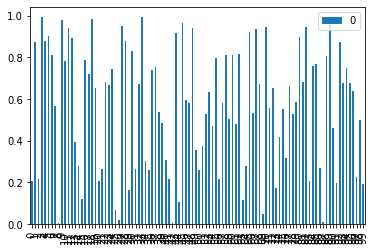

In [50]:
import pandas as pd
pd.DataFrame(np.random.rand(100)).plot(kind='bar')

In [60]:
a = np.random.rand(100)
msk = a < 0.8
train = a[msk]
len(train)

80

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib notebook

In [111]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

<IPython.core.display.Javascript object>


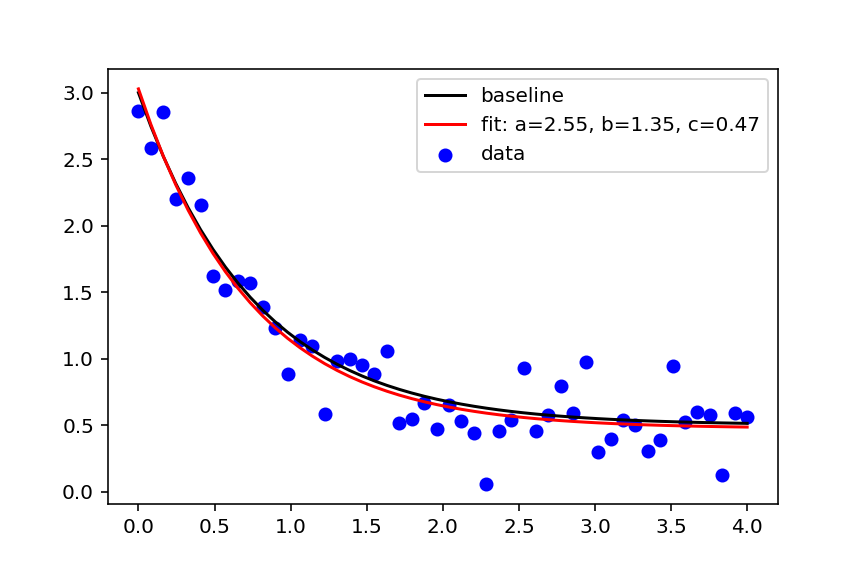

In [112]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)

y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

plt.scatter(xdata, ydata, c='b', label='data')
plt.plot(xdata, y, c='k', label='baseline')
plt.legend()

In [113]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

[2.55423706 1.35190947 0.47450618]


In [114]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a={:.2f}, b={:.2f}, c={:.2f}'.format(*popt))
plt.legend()

In [120]:
%pwd

'/Users/min/OneDrive - Penspen/Python/Py_DataSci'

In [127]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([5, 10, 15])
expected = np.array([7, 11, 12])

chisquare_value, pvalue = chisquare(observed, expected)
print(chisquare_value, pvalue)

1.4123376623376624 0.4935313821395443


In [152]:
chisquare_value = np.sum((observed - expected) ** 2 / expected)
chisquare_value

1.4123376623376624

<AxesSubplot:ylabel='Count'>

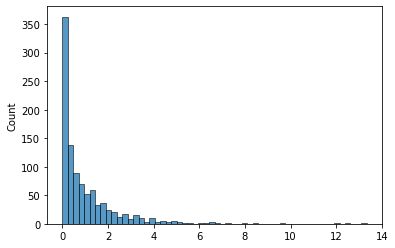

In [147]:
import seaborn as sns
%matplotlib inline

chi_squared_values = []
size = 32561
for i in range(1000):    
    sequence = np.random.binomial(1, 0.5, size=size)   
    male_count = len(sequence[sequence == 0])    
    female_count = len(sequence[sequence == 1])    
    male_diff = (male_count - size / 2) ** 2 / (size / 2)    
    female_diff = (female_count - size / 2) ** 2 / (size / 2)    
    chi_squared = male_diff + female_diff    
    chi_squared_values.append(chi_squared)
    
sns.histplot(chi_squared_values)

In [155]:
from scipy.stats import chi2_contingency

observed = np.array([[5, 5], [10, 10]])
print(observed)

chisq_value, pvalue, df, expected = chi2_contingency(observed)
print(expected)

(chisq_value, pvalue, df)

[[ 5  5]
 [10 10]]
[[ 5.  5.]
 [10. 10.]]


(0.0, 1.0, 1)

In [161]:
a = [0,1,1,2,3,5,1,0]
a.remove(9) if 9 in a else a
a

[0, 1, 1, 2, 3, 5, 1, 0]

<IPython.core.display.Javascript object>


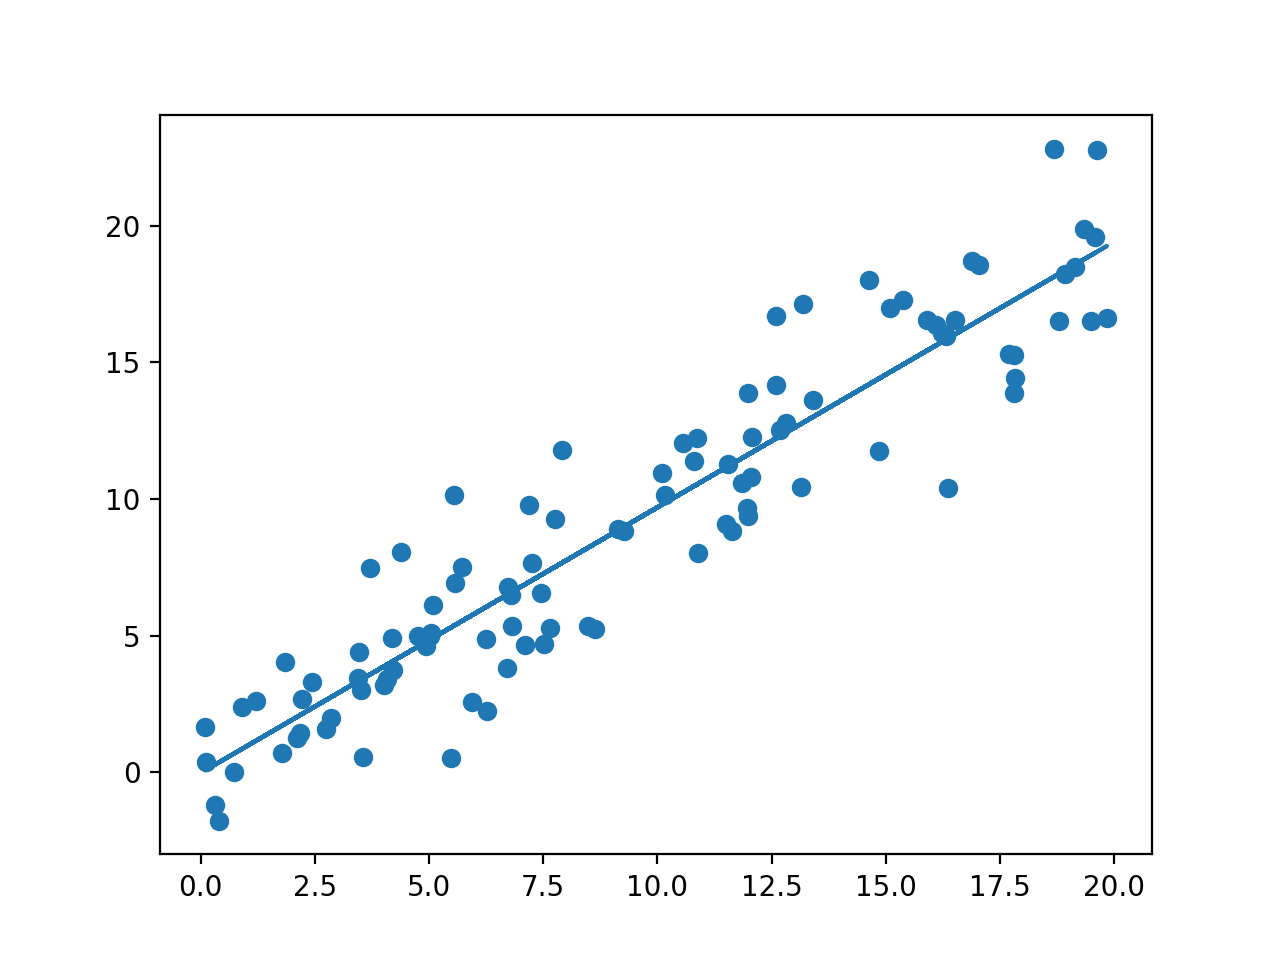

In [3]:
%matplotlib notebook
np.random.seed(100)
data_x = np.random.uniform(0, 20, 100)
data_y = data_x + np.random.normal(0, 2, len(data_x))
plt.scatter(data_x, data_y)

In [4]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(data_x.reshape(-1,1), data_y)
plt.plot(data_x, LR.predict(data_x.reshape(-1,1)))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

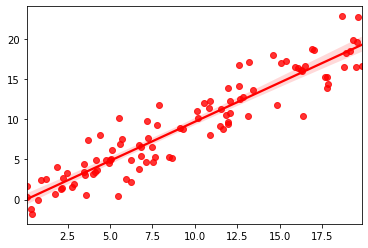

In [12]:
import seaborn as sns
sns.regplot(data_x, data_y, color='r')

<IPython.core.display.Javascript object>


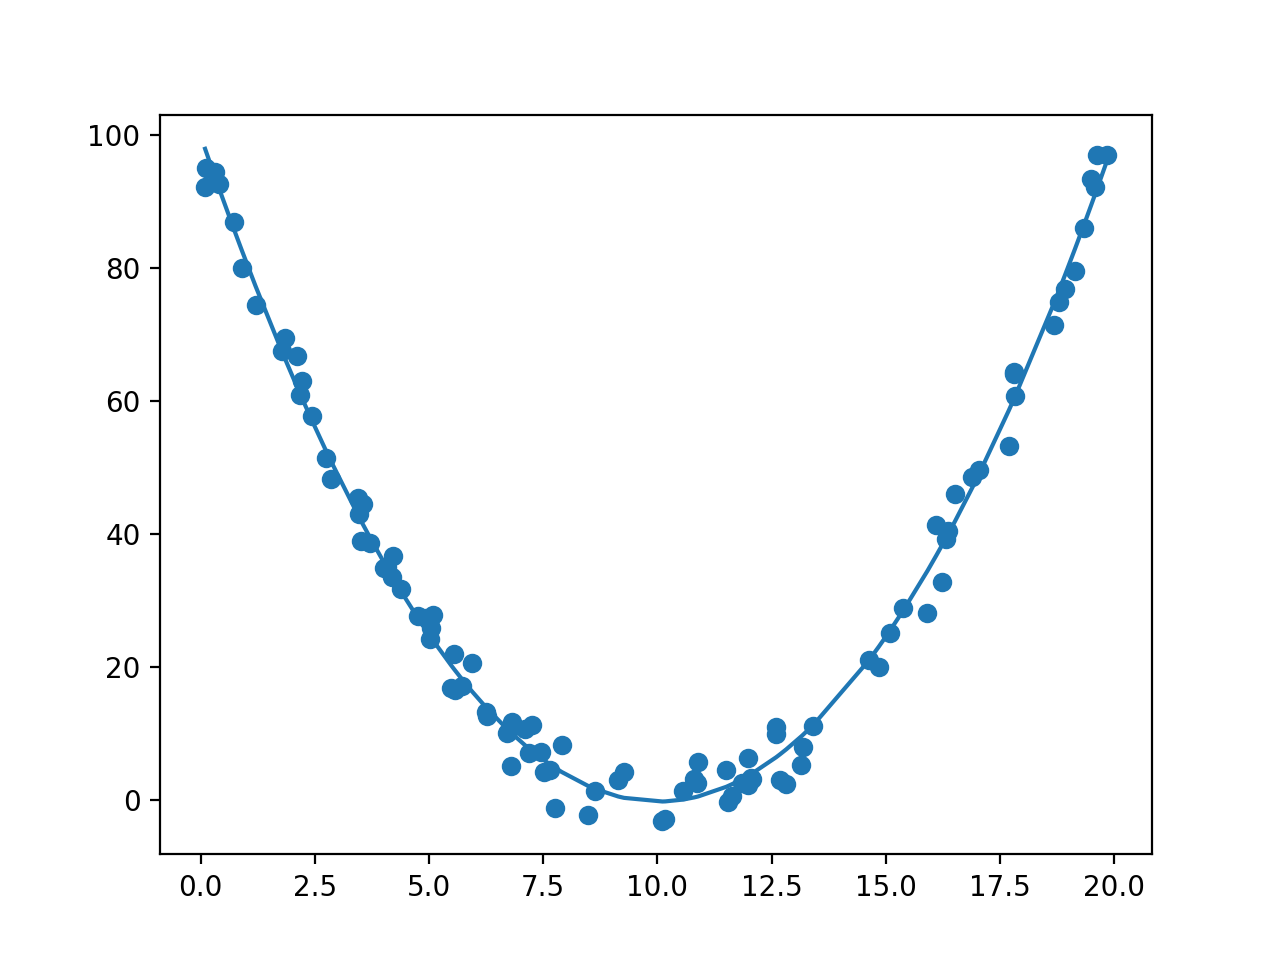

In [21]:
%matplotlib notebook
data_y2 = (data_x - 10) ** 2 + np.random.normal(0, 3, len(data_x))
plt.scatter(data_x, data_y2)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_x = PolynomialFeatures(2).fit_transform(data_x.reshape(-1,1))
lm_poly = LinearRegression().fit(poly_x, data_y2)
sns.lineplot(data_x, lm_poly.predict(poly_x))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>